### Student Information
Name: Alex Hernandez 

Student ID: 108065427

GitHub ID: alexnehe

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 


To start:

In [1]:
%load_ext autoreload
%autoreload 2

Libraries and set up for take-home homework exercises 

In [2]:
#Import libraries
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
import nltk
import plotly as py
import math
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer


from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

#Data visualization libraries
import matplotlib.pyplot as plt
from plotly import tools
import seaborn as sns
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Dimensionality Reduction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import cosine_similarity



#Set up for homework exercises
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

#helpers
import helpers.data_mining_helpers as dmh

#Construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

#Add category to the dataframe
X['category'] = twenty_train.target

X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

** >>> Exercise 2 (take home):**
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [3]:
#Query and specify whether the first 30 records belong to either the 1st, 2nr or 3rd category
X.query('(category == [1, 2, 3])')[0:30] 

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
𝐻𝑖𝑛𝑡  : why .isnull() didn't work?

In [4]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                            },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Answer: 

isnull is a function to find and manage null values in a dataframe.It return a boolean same-sized object indicating if the values are NA. Missing values gets mapped to True and non-missing value gets mapped to False .
In this case the explicity declared strings 'NaN', 'None' and empty string '' are evaluated as False because the method 
has no way of knowing what is the value inside the string.

In [6]:
X_sample = X.sample(n=1000)

In [7]:
len(X_sample)

1000

In [8]:
X_sample[0:4]

,text,category,category_name
1892,From: oehler@picard.cs.wisc.edu (Eric Oehler) ...,1,comp.graphics
1659,"Subject: Burzynski's ""Antineoplastons"" From: j...",2,sci.med
1790,From: jhwitten@cs.ruu.nl (Jurriaan Wittenberg)...,1,comp.graphics
369,From: rsteele@adam.ll.mit.edu (Rob Steele) Sub...,3,soc.religion.christian


Answer: 

Our original data set X is not affected when using the DataFrame.sample() method.
This fucntion only creates a copy of ramdomly selected items which then are assigned to the X_sample dataset.

Because the samples are randomly chosen, this function doesn't ensure sorting. If we want to sort in 
ascending order we can do X_sample.sort_index().

#### Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

AxesSubplot(0.125,0.125;0.775x0.755)


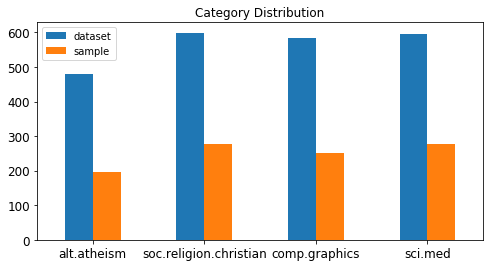

In [9]:
sample_counts = X_sample.category_name.value_counts()
actual_counts = X.category_name.value_counts()

combined_data_frame = pd.DataFrame({'dataset': actual_counts,
                    'sample': sample_counts}, index = categories)

print(combined_data_frame.plot.bar(title = 'Category Distribution', rot = 0, fontsize = 12, figsize = (8,4)))

#### Exercise 10 (take home):
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [10]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [11]:
array = X_counts[4:10, 0:100].toarray() #get the 10th record

for word in count_vect.inverse_transform(array)[0]:
    print('word: %s' % word)

word: 00
word: 01


#### Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

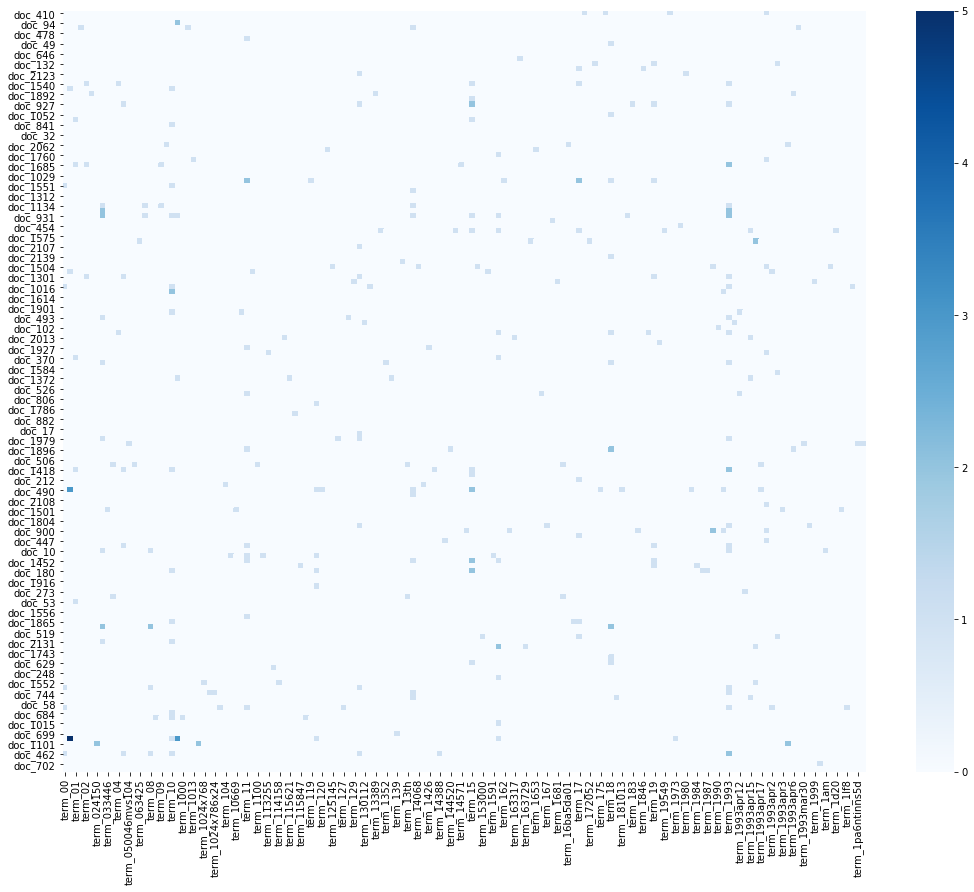

In [12]:
n = 150
sample_X = X.sample(n=n, random_state = 26)
sample_count_vect = CountVectorizer()
sample_counts = sample_count_vect.fit_transform(sample_X.text)
plot_x = ["term_"+str(i) for i in sample_count_vect.get_feature_names()[0:n]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(sample_X.index)[:n]]
plot_z = sample_counts[0:n, 0:n].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="Blues",
                 vmin=0, annot=False)

#### Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

𝐻𝑖𝑛𝑡 : you can refer to Axes3D in the documentation.

Dimension:
(2257, 3)


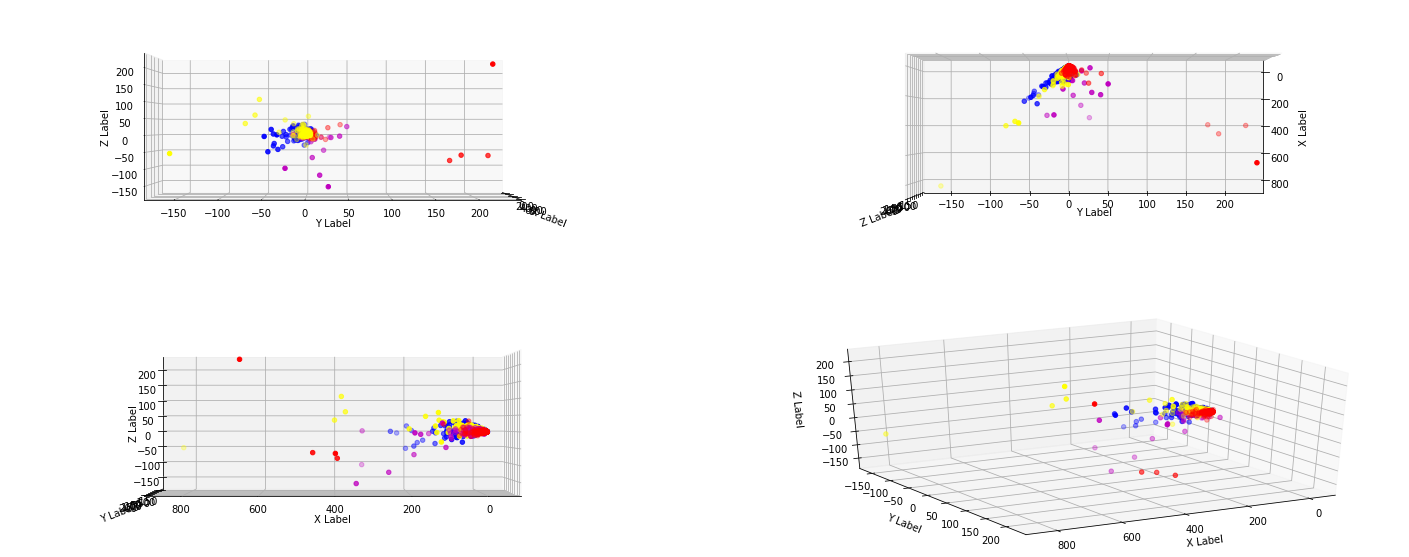

In [13]:
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print('Dimension:')
print(X_reduced3.shape)

col = ['yellow', 'blue', 'red', 'm']
fig = plt.figure(figsize = (25,10))

ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2, projection='3d')
ax3 = fig.add_subplot(2,2,3, projection='3d')
ax4 = fig.add_subplot(2,2,4, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
    
    ax1.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax2.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax3.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax4.scatter3D(xs, ys, zs, c= c, marker = 'o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax1.view_init(0, 0)

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.view_init(90, 0)

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
ax3.view_init(0, 90)

ax4.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax4.set_xlabel('\nX Label')
ax4.set_ylabel('\nY Label')
ax4.set_zlabel('\nZ Label')
ax4.view_init(30, 60)

plt.show()

#### Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [19]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [20]:
data = go.Bar(x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:300]], #string concatenation is required
            y=term_frequencies[:300])

fig = go.Figure(data)

fig.update_layout(
    title=go.layout.Title(
        text="Term Frequencies",
        xref="paper",
        x=0
    )
)

fig.show()

#### Exercise 14 (take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [27]:
term_frequencies_df = pd.DataFrame({'terms': count_vect.get_feature_names(), 
                                            'counts': term_frequencies})
sample_term_frequencies_df = term_frequencies_df.sample(n=100, random_state=26)

sample_data = go.Bar(x = ["term_"+str(i) for i in sample_term_frequencies_df['terms']],
            y=sample_term_frequencies_df['counts'])

fig = go.Figure(sample_data)

fig.update_layout(
    title=go.layout.Title(
        text="Data concepts",
        xref="paper",
        x=0
    )
)

fig.show()

#### Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [26]:
ordered_term_frequencies_df = sample_term_frequencies_df.sort_values(by = 'counts', ascending = False)

ordered_data = go.Bar(x=["term_"+str(i) for i in ordered_term_frequencies_df['terms']],
            y=ordered_term_frequencies_df['counts'])

fig = go.Figure(ordered_data)

fig.update_layout(
    title=go.layout.Title(
        text="Long tailed distribution",
        xref="paper",
        x=0
    )
)

fig.show()

#### Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

# 2. Working with the New Data Set

A. Create a dictionary with the dataset

In [ ]:
#load data into python array
sentiment_data_array = []
with open("sentiment_labelled_sentences/amazon_cells_labelled.txt","r") as amazon_data:
    sentiment_data_array += [string + '\tamazon' for string in amazon_data.read().split('\n')]
with open("sentiment_labelled_sentences/imdb_labelled.txt","r") as imdb_data:
    sentiment_data_array += [string + '\timdb' for string in imdb_data.read().split('\n')]
with open("sentiment_labelled_sentences/yelp_labelled.txt","r") as yelp_data:
    sentiment_data_array += [string + '\tyelp' for string in yelp_data.read().split('\n')]

#create dictionary with the array
sentiment_data = dmh.sentiment_data_dictionary(sentiment_data_array)

B. Converting dictionary into panda dataframes

In [ ]:
# construct dataframe from the created dictionary
sentiment_df = pd.DataFrame.from_records(data = {"sentence":sentiment_data['sentences'], "score":sentiment_data['scores'], "source":sentiment_data['sources']})

Print the first 20 records from the dataframe

In [ ]:
sentiment_df[:20]

Print the last 10 sentences

In [ ]:
sentiment_df[-20:][["sentence", "source"]]

Query every 2 records for the first 15 items

In [ ]:
sentiment_df.iloc[::2, 0:2][0:15]

C. Data Manipulation

Sampling

In [ ]:
records = 700
sentiment_df_sample = sentiment_data_df.sample(n=records, random_state=26)

In [ ]:
sample_counts = sentiment_data_sample.score.value_counts()
actual_counts = sentiment_data_df.score.value_counts()

combined_data_frame = pd.DataFrame({'data': actual_counts,
                    'sample': sample_counts})

print(combined_data_frame.plot.bar(title = 'Sentiment Distribution', rot = 0, fontsize = 12, figsize = (8,4), tick_label = ['negative', 'positive']))

Pie Chart

In [ ]:
labels = sentiment_df.source.value_counts().index
values = sentiment_df.source.value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_layout(
    title=go.layout.Title(
        text="Sentences Source",
        xref="paper",
        x=0
    )
)

fig.show()

Feature creation

In [ ]:
sentiment_df['unigrams'] = sentiment_data_df['sentence'].apply(lambda x: dmh.tokenize_text(x))

Convert array to double array

In [ ]:
sentiment_df[0:5]

In [ ]:
list(sentiment_df[0:1]['unigrams'])

Feature subset selection